In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [3]:
#read train csv file with only 5million rows (rather than 55m rows, dropping key column)
taxi = pd.read_csv('train_1.csv', nrows=5000000).drop(columns='key')

In [4]:
#initial stats on dataset of 5 M rows

taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5000000.000,5000000.000,5000000.000,4999964.000,4999964.000,5000000.000
mean,11.341,-72.507,39.920,-72.507,39.917,1.685
std,9.820,12.810,8.964,12.848,9.487,1.332
min,-100.000,-3426.609,-3488.080,-3412.653,-3488.080,0.000
25%,6.000,-73.992,40.735,-73.991,40.734,1.000
50%,8.500,-73.982,40.753,-73.980,40.753,1.000
75%,12.500,-73.967,40.767,-73.964,40.768,2.000
max,1273.310,3439.426,3310.364,3457.622,3345.917,208.000


In [5]:
#From above dataset 
    # minimum fare is negative
    #min and max longitude and latitude looks weird
    #min passenger count is 0 

taxi.head()   

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.500,2009-06-15 17:26:21 UTC,-73.844,40.721,-73.842,40.712,1
1,16.900,2010-01-05 16:52:16 UTC,-74.016,40.711,-73.979,40.782,1
2,5.700,2011-08-18 00:35:00 UTC,-73.983,40.761,-73.991,40.751,2
3,7.700,2012-04-21 04:30:42 UTC,-73.987,40.733,-73.992,40.758,1
4,5.300,2010-03-09 07:51:00 UTC,-73.968,40.768,-73.957,40.784,1


In [12]:
taxi = taxi[((taxi['pickup_longitude'] >-78) & (taxi['pickup_longitude'] < -70)) & 
            ((taxi['dropoff_longitude']>-78) & (taxi['dropoff_longitude'] < -70)) & 
            ((taxi['pickup_latitude'] > 37)& (taxi['pickup_latitude'] < 45)) & 
            ((taxi['dropoff_latitude']> 37) & (taxi['dropoff_latitude']<45)) &
            (taxi['passenger_count'] > 0) & (taxi['fare_amount'] >= 2.5)]

In [13]:
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4878498.000,4878498.000,4878498.000,4878498.000,4878498.000,4878498.000
mean,11.333,-73.975,40.751,-73.974,40.751,1.690
std,9.727,0.043,0.034,0.042,0.037,1.314
min,2.500,-77.902,37.031,-77.971,37.031,1.000
25%,6.000,-73.992,40.737,-73.992,40.736,1.000
50%,8.500,-73.982,40.753,-73.981,40.754,1.000
75%,12.500,-73.968,40.768,-73.965,40.768,2.000
max,952.000,-70.000,44.732,-70.002,44.728,208.000


(0, 200)

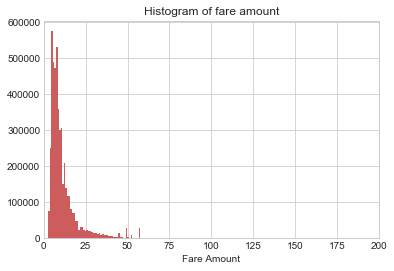

In [24]:
plt.hist(taxi.fare_amount, 1000, color = 'indianred')
plt.xlabel('Fare Amount')
plt.title('Histogram of fare amount')
plt.xlim(0,200)

In [26]:
#histogram of fare amounts shows magority of fare amounts are very small (less than 50$)

taxi.groupby('fare_amount').size().nlargest(10)

fare_amount
6.500     237317
4.500     200433
8.500     183203
5.700     142304
5.300     142293
6.100     138084
4.900     138049
6.900     127239
10.500    124046
7.300     119606
dtype: int64

In [33]:
#this indicates most fare amount are very small 

taxi.groupby('fare_amount').size().nlargest(10)

fare_amount
6.500     237317
4.500     200433
8.500     183203
5.700     142304
5.300     142293
6.100     138084
4.900     138049
6.900     127239
10.500    124046
7.300     119606
dtype: int64

In [10]:
taxi.groupby('passenger_count').size()

passenger_count
0        17639
1      3459028
2       738350
3       219265
4       106019
5       353909
6       105778
7            1
9            2
51           1
129          1
208          7
dtype: int64

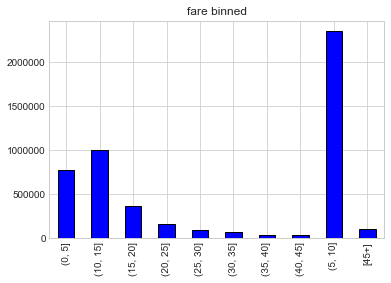

In [21]:
taxi['fare-bin'] = pd.cut(taxi['fare_amount'], bins = list(range(0,50,5))).astype(str)

taxi.loc[taxi['fare-bin'] == 'nan', 'fare-bin'] = '[45+]'

taxi.loc[taxi['fare-bin'] == '(5,10]', 'fare-bin'] = '(05,10]'

taxi['fare-bin'].value_counts().sort_index().plot.bar(color = 'b', edgecolor = 'k');
plt.title('fare binned');

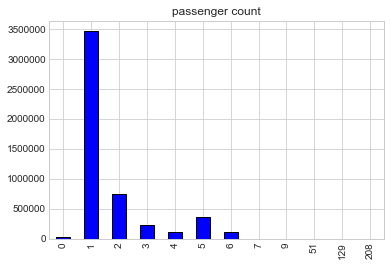

In [15]:
#number of passengers per rides

taxi['passenger_count'].value_counts().sort_index().plot.bar(color = 'b', edgecolor = 'k');
plt.title('passenger count');